# This notebook runs a quick parameter sweep on freeze cell covariance for buffers of +/- 2, 4, and 6 seconds

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import scipy.io as sio
import pingouin as pg
from copy import copy, deepcopy

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import freezing_analysis as fa
from plotting import Fig, pretty_plot, FigMirror
from helpers import contiguous_regions
import covariance_analysis as cova

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
def add_memory_designations(df_use, key_use="d1_d2", before=['-2_-1', '-1_4'], during=['4_1'], 
                            after=['1_2', '2_7']):
    """Add in designations for before, 4hr (during), and after ANI administration into your dataframe"""
    df = deepcopy(df_use)
    desig = ["" for a in df.itertuples()]
    
    def create_bool_array_from_list(bool_list):
        bool_out = False
        for b in bool_list:
            bool_out = np.bitwise_or(bool_out, b)
            
        return bool_out
    
    before_bool_list = [df[key_use] == bef for bef in before]
    before_ind = np.where(create_bool_array_from_list(before_bool_list))[0]
    during_bool_list = [df[key_use] == dur for dur in during]
    during_ind = np.where(create_bool_array_from_list(during_bool_list))[0]
    after_bool_list = [df[key_use] == aft for aft in after]
    after_ind = np.where(create_bool_array_from_list(after_bool_list))[0]
    
    for idd, d in enumerate(desig):
        if idd in before_ind:
            desig[idd] = "Before"
        elif idd in during_ind:
            desig[idd] = "4hr"
        elif idd in after_ind:
            desig[idd] = "After"

    df['Designation'] = desig
    
    return df

In [24]:
freeze_silent_cov6

{'Learners': {'Marble07': {'-2_-1': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.03193003,  0.        , -0.03085033, ..., -0.01342075,
           -0.02917797,  0.        ],
          [ 0.02864302, -0.02745034,  0.        , ..., -0.01952546,
           -0.02335655,  0.        ],
          ...,
          [-0.03246302, -0.01937489, -0.02961606, ...,  0.        ,
           -0.01846702,  0.        ],
          [-0.01038813, -0.02330732, -0.0356271 , ..., -0.01400722,
            0.        ,  0.        ],
          [-0.01323459, -0.01956162, -0.0299015 , ...,  0.08303989,
           -0.00629895,  0.        ]]),
   '-1_4': array([[ 0.        ,  0.00638599,  0.        , ...,  0.02444179,
           -0.03259235, -0.03195806],
          [ 0.11523432,  0.        ,  0.        , ..., -0.01321382,
            0.15400027, -0.00456841],
          [ 0.06445617,  0.19840022,  0.        , ...,  0.        ,
            0.        ,  0

In [20]:
bin_size = 0.5 # sec
all_cov = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                               neurons='all', keep_silent=True, buffer_sec=(6, 6))
freeze_silent_cov2 = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                               neurons='freeze_onset', keep_silent=True, buffer_sec=(2, 2))
freeze_silent_cov4 = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                               neurons='freeze_onset', keep_silent=True, buffer_sec=(4, 4))
freeze_silent_cov6 = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                               neurons='freeze_onset', keep_silent=True, buffer_sec=(6, 6))

# Now z-score to baseline days (-2 and -1), add in columns and reorganize a bit
sigz_freeze_df2 = cova.cov_dict_to_df(freeze_silent_cov2, baseline_dict_use=all_cov, include_silent=True)
sigz_freeze_df2 = add_memory_designations(sigz_freeze_df2)
sigz_freeze_df4 = cova.cov_dict_to_df(freeze_silent_cov4, baseline_dict_use=all_cov, include_silent=True)
sigz_freeze_df4 = add_memory_designations(sigz_freeze_df4)
sigz_freeze_df6 = cova.cov_dict_to_df(freeze_silent_cov6, baseline_dict_use=all_cov, include_silent=True)
sigz_freeze_df6 = add_memory_designations(sigz_freeze_df6)

sigz_all_df = cova.cov_dict_to_df(all_cov, baseline_dict_use=all_cov, include_silent=True)
sigz_all_df = add_memory_designations(sigz_all_df)


Marble07: 5it [00:03,  1.30it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:04,  1.28it/s]
Marble12: 5it [00:03,  1.53it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:03,  1.54it/s]
Marble24: 5it [00:03,  1.51it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:03,  1.54it/s]
Marble27: 5it [00:03,  1.49it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:04,  1.49it/s]
Marble06: 4it [00:02,  1.46it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:05,  1.03it/s]
Marble11: 5it [00:04,  1.07it/s]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:05,  1.07it/s]
Marble29: 5it [00:03,  1.45it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:04,  1.45it/s]
Marble17: 5it [00:04,  1.21it/s]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:04,  1.23it/s]
Marble18: 5it [00:03,  1.62it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:03,  1.62it/s]
Marble19: 5it [00:03,  1.42it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:04,  1.43it/s]
Marble20: 5it [00:03,  1.59it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:03,  1.60it/s]
Marble25: 5it [00:03,  1.33it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:04,  1.35it/s]
Marble07: 4it [00:04,  1.04s/it]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:06,  1.03s/it]
Marble12: 4it [00:03,  1.15it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:05,  1.15it/s]
Marble24: 4it [00:03,  1.12it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:05,  1.07it/s]
Marble27: 4it [00:03,  1.07it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:05,  1.07it/s]
Marble06: 4it [00:03,  1.05it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:07,  1.24s/it]
Marble11: 4it [00:05,  1.27s/it]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:07,  1.27s/it]
Marble29: 4it [00:03,  1.04it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:05,  1.03it/s]
Marble17: 4it [00:04,  1.12s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:06,  1.11s/it]
Marble18: 4it [00:03,  1.14it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:05,  1.14it/s]
Marble19: 4it [00:03,  1.03it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:05,  1.01it/s]
Marble20: 4it [00:03,  1.14it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:05,  1.14it/s]
Marble25: 4it [00:03,  1.05it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:05,  1.04it/s]
Marble07: 4it [00:04,  1.01s/it]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:06,  1.02s/it]
Marble12: 4it [00:03,  1.13it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:05,  1.11it/s]
Marble24: 4it [00:03,  1.08it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:05,  1.08it/s]
Marble27: 4it [00:03,  1.09it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:05,  1.07it/s]
Marble06: 4it [00:03,  1.07it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:07,  1.21s/it]
Marble11: 4it [00:04,  1.21s/it]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:07,  1.21s/it]
Marble29: 4it [00:03,  1.07it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:05,  1.05it/s]
Marble17: 4it [00:04,  1.06s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:06,  1.07s/it]
Marble18: 4it [00:03,  1.15it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:05,  1.15it/s]
Marble19: 4it [00:03,  1.02it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:05,  1.01it/s]
Marble20: 4it [00:03,  1.15it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:05,  1.14it/s]
Marble25: 4it [00:03,  1.04it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:05,  1.03it/s]
Marble07: 4it [00:04,  1.01s/it]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:06,  1.01s/it]
Marble12: 4it [00:03,  1.15it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:05,  1.15it/s]
Marble24: 4it [00:03,  1.14it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:05,  1.13it/s]
Marble27: 4it [00:03,  1.11it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:05,  1.11it/s]
Marble06: 4it [00:03,  1.08it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:07,  1.21s/it]
Marble11: 4it [00:04,  1.20s/it]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:07,  1.20s/it]
Marble29: 4it [00:03,  1.04it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:05,  1.05it/s]
Marble17: 4it [00:04,  1.07s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:06,  1.08s/it]
Marble18: 4it [00:03,  1.11it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:05,  1.12it/s]
Marble19: 4it [00:04,  1.11s/it]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:06,  1.06s/it]
Marble20: 4it [00:03,  1.03it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:05,  1.05it/s]
Marble25: 4it [00:04,  1.01s/it]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:05,  1.00it/s]
/Users/nkinsky/Documents/BU/GitHub/Eraser/covariance_analysis.py:330: RuntimeWarning: Mean of empty slice
  sigzmean.append(np.nanmean(sigzall[-1]))


In [23]:
sigz_freeze_df6

,d1_d2,Group,cov_z_mean,Designation
0,-2_-1,Ctrl,0.144802,Before
1,-1_4,Ctrl,0.068803,Before
2,4_1,Ctrl,0.094678,4hr
3,1_2,Ctrl,0.119861,After
4,2_7,Ctrl,0.123961,After
...,...,...,...,...
67,-1_4,ANI,0.095381,Before
68,4_1,ANI,0.777352,4hr
69,1_2,ANI,0.283524,After
70,2_7,ANI,0.266276,After


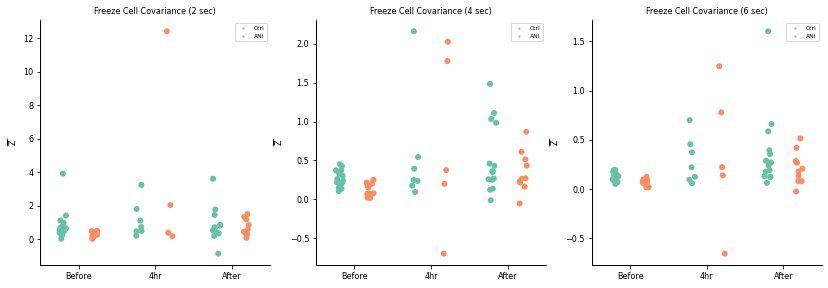

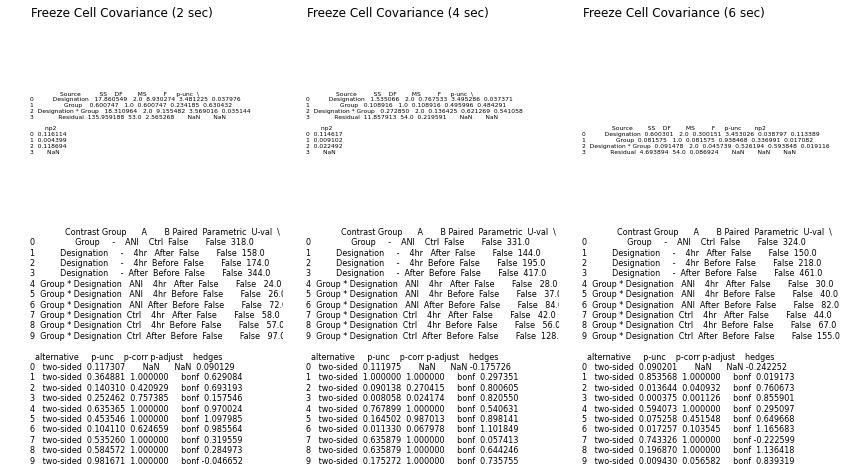

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4.5))
figs, axs = plt.subplots(1, 3, figsize=(14, 6))

cmap_use = plt.get_cmap('Set2').colors # Use consistent colormap

for a, astat, title_use, df_use in zip(ax, axs, ['Freeze Cell Covariance (2 sec)', 'Freeze Cell Covariance (4 sec)', 
                                        'Freeze Cell Covariance (6 sec)'], 
                                       [sigz_freeze_df2, sigz_freeze_df4, sigz_freeze_df6]):
    # Plot data
    gfg = sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True, ax=a)
    gfg.legend(fontsize=6, markerscale=0.15)
    a.set_title(title_use, fontsize=8)
    a.set_ylabel(r'$\mathregular{\overline{Z}}$', fontsize=8)
    a.set_xlabel('', fontsize=8)
    a.tick_params(axis='both', which='major', labelsize=8, grid_linewidth=1)
    plt.setp(a.spines.values(), linewidth=1)
    sns.despine(ax=a)
    
    # Calculate and plot stats
#     stats_before_after(df_use, 'cov_z_mean', ax=astat, fontsize=6)
    stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
    pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
    astat.set_title(title_use)
    astat.text(0.1, 0.6, str(stats_sig), fontdict={'fontsize': 6})
    astat.text(0.1, -0.35, str(pw_sig), fontdict={'fontsize': 8})
    sns.despine(ax=astat, bottom=True, left=True)
    astat.tick_params(axis='both', left=False, bottom=False, labelleft=False, labelbottom=False)

In [27]:
# Now look at things broken up by Learners/Non-Learners/ANI
sigz_freeze_df2sep = cova.cov_dict_to_df(freeze_silent_cov2, baseline_dict_use=all_cov, include_silent=True,
                                     group_ctrls=False)
sigz_freeze_df2sep = add_memory_designations(sigz_freeze_df2sep)
sigz_freeze_df4sep = cova.cov_dict_to_df(freeze_silent_cov4, baseline_dict_use=all_cov, include_silent=True,
                                     group_ctrls=False)
sigz_freeze_df4sep = add_memory_designations(sigz_freeze_df4sep)
sigz_freeze_df6sep = cova.cov_dict_to_df(freeze_silent_cov6, baseline_dict_use=all_cov, include_silent=True,
                                     group_ctrls=False)
sigz_freeze_df6sep = add_memory_designations(sigz_freeze_df6sep)

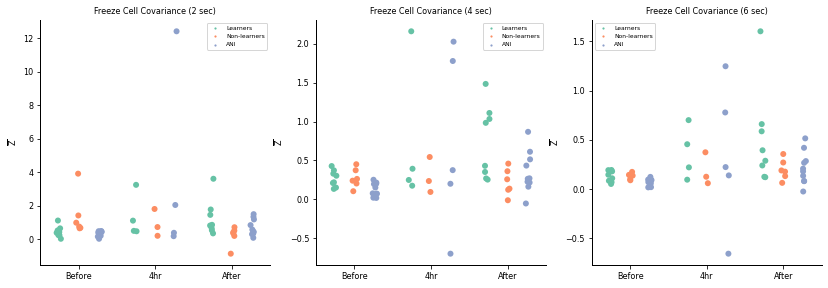

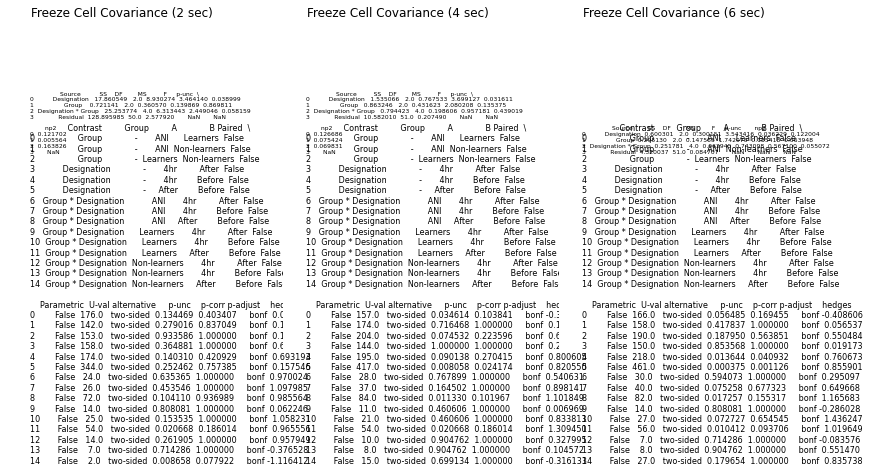

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4.5))
figs, axs = plt.subplots(1, 3, figsize=(14, 6))

cmap_use = plt.get_cmap('Set2').colors # Use consistent colormap

for a, astat, title_use, df_use in zip(ax, axs, ['Freeze Cell Covariance (2 sec)', 'Freeze Cell Covariance (4 sec)', 
                                        'Freeze Cell Covariance (6 sec)'], 
                                       [sigz_freeze_df2sep, sigz_freeze_df4sep, sigz_freeze_df6sep]):
    # Plot data
    gfg = sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True, ax=a)
    gfg.legend(fontsize=6, markerscale=0.15)
    a.set_title(title_use, fontsize=8)
    a.set_ylabel(r'$\mathregular{\overline{Z}}$', fontsize=8)
    a.set_xlabel('', fontsize=8)
    a.tick_params(axis='both', which='major', labelsize=8, grid_linewidth=1)
    plt.setp(a.spines.values(), linewidth=1)
    sns.despine(ax=a)
    
    # Calculate and plot stats
#     stats_before_after(df_use, 'cov_z_mean', ax=astat, fontsize=6)
    stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
    pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
    astat.set_title(title_use)
    astat.text(0.1, 0.6, str(stats_sig), fontdict={'fontsize': 6})
    astat.text(0.1, -0.35, str(pw_sig), fontdict={'fontsize': 8})
    sns.despine(ax=astat, bottom=True, left=True)
    astat.tick_params(axis='both', left=False, bottom=False, labelleft=False, labelbottom=False)

In [32]:
freeze_silent_cov4_frz_only = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                                         neurons='freeze_onset', keep_silent=True, buffer_sec=(4, 4),
                                                         keep_events='freeze_onset', keep_buffer=(4, 4))

Marble07: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble07: 1it [00:01,  1.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble07: 2it [00:01,  1.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble07: 3it [00:02,  1.02it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble07: 4it [00:04,  1.03s/it]

[0 0 0 ... 0 0 0]
No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble07: 5it [00:05,  1.09s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble07: 6it [00:06,  1.04s/it]
Marble12: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble12: 1it [00:00,  1.15it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble12: 2it [00:01,  1.01s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble12: 3it [00:02,  1.03it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble12: 4it [00:03,  1.08it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble12: 5it [00:04,  1.11it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble12: 6it [00:05,  1.11it/s]
Marble24: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble24: 1it [00:00,  1.15it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble24: 2it [00:01,  1.17it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble24: 3it [00:02,  1.19it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble24: 4it [00:03,  1.17it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble24: 5it [00:04,  1.12it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble24: 6it [00:05,  1.15it/s]
Marble27: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble27: 1it [00:00,  1.12it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble27: 2it [00:01,  1.14it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble27: 3it [00:02,  1.14it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble27: 4it [00:03,  1.09it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble27: 5it [00:04,  1.11it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble27: 6it [00:05,  1.12it/s]
Marble06: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble06: 1it [00:00,  1.11it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble06: 2it [00:01,  1.12it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble06: 3it [00:02,  1.12it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble06: 4it [00:03,  1.13it/s]

[0 0 0 ... 0 0 0]
No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 5it [00:06,  1.51s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble06: 6it [00:07,  1.18s/it]
Marble11: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble11: 1it [00:01,  1.14s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble11: 2it [00:02,  1.13s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble11: 3it [00:03,  1.14s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble11: 4it [00:04,  1.11s/it]

[0 0 0 ... 0 0 0]
No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble11: 5it [00:05,  1.10s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble11: 6it [00:06,  1.11s/it]
Marble29: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble29: 1it [00:01,  1.02s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble29: 2it [00:01,  1.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble29: 3it [00:02,  1.04it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble29: 4it [00:03,  1.04it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble29: 5it [00:04,  1.04it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble29: 6it [00:05,  1.05it/s]
Marble17: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble17: 1it [00:01,  1.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble17: 2it [00:01,  1.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble17: 3it [00:02,  1.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble17: 4it [00:03,  1.00it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble17: 5it [00:04,  1.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble17: 6it [00:05,  1.01it/s]
Marble18: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble18: 1it [00:00,  1.20it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble18: 2it [00:01,  1.21it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble18: 3it [00:02,  1.22it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble18: 4it [00:03,  1.22it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble18: 5it [00:04,  1.22it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble18: 6it [00:04,  1.22it/s]
Marble19: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble19: 1it [00:00,  1.04it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble19: 2it [00:01,  1.05it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble19: 3it [00:02,  1.09it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble19: 4it [00:03,  1.10it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble19: 5it [00:04,  1.09it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble19: 6it [00:05,  1.10it/s]
Marble20: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble20: 1it [00:00,  1.19it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble20: 2it [00:01,  1.20it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble20: 3it [00:02,  1.21it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble20: 4it [00:03,  1.21it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble20: 5it [00:04,  1.20it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble20: 6it [00:04,  1.21it/s]
Marble25: 0it [00:00, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble25: 1it [00:00,  1.00it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble25: 2it [00:01,  1.04it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble25: 3it [00:02,  1.09it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble25: 4it [00:03,  1.10it/s]

[0 0 0 ... 0 0 0]
No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()
[0 0 0 ... 0 0 0]


Marble25: 5it [00:04,  1.09it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Marble25: 6it [00:05,  1.09it/s]


In [37]:
sigz_freeze_df4_frz_only = cova.cov_dict_to_df(freeze_silent_cov4_frz_only, baseline_dict_use=all_cov, include_silent=True,
                                     group_ctrls=True)
sigz_freeze_df4_frz_only  = add_memory_designations(sigz_freeze_df4_frz_only)

sigz_freeze_df4_frz_only_sep = cova.cov_dict_to_df(freeze_silent_cov4_frz_only, baseline_dict_use=all_cov, include_silent=True,
                                     group_ctrls=False)
sigz_freeze_df4_frz_only_sep  = add_memory_designations(sigz_freeze_df4_frz_only_sep)

                Source         SS    DF        MS         F     p-unc  \
0          Designation   1.829467   2.0  0.914734  3.114135  0.052483   
1                Group   0.028264   1.0  0.028264  0.096221  0.757607   
2  Designation * Group   0.187403   2.0  0.093702  0.319000  0.728236   
3             Residual  15.861745  54.0  0.293736       NaN       NaN   

        np2  
0  0.103411  
1  0.001779  
2  0.011677  
3       NaN  
              Contrast Group      A       B Paired  Parametric  U-val  \
0                Group     -    ANI    Ctrl  False       False  385.0   
1          Designation     -    4hr   After  False       False  125.0   
2          Designation     -    4hr  Before  False       False  170.0   
3          Designation     -  After  Before  False       False  417.0   
4  Group * Designation   ANI    4hr   After  False       False   22.0   
5  Group * Designation   ANI    4hr  Before  False       False   28.0   
6  Group * Designation   ANI  After  Before  False   

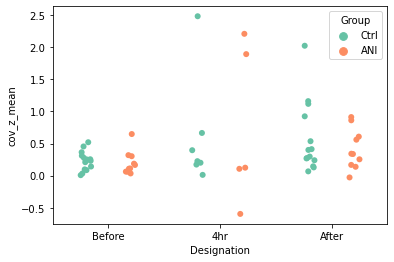

In [36]:
df_use = sigz_freeze_df4_frz_only
sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True)
stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
print(stats_sig)
print(pw_sig)

                Source         SS    DF        MS         F     p-unc  \
0          Designation   1.829467   2.0  0.914734  3.258879  0.046568   
1                Group   0.721007   2.0  0.360504  1.284349  0.285632   
2  Designation * Group   1.041234   4.0  0.260308  0.927389  0.455443   
3             Residual  14.315172  51.0  0.280690       NaN       NaN   

        np2  
0  0.113317  
1  0.047951  
2  0.067805  
3       NaN  
               Contrast         Group         A             B Paired  \
0                 Group             -       ANI      Learners  False   
1                 Group             -       ANI  Non-learners  False   
2                 Group             -  Learners  Non-learners  False   
3           Designation             -       4hr         After  False   
4           Designation             -       4hr        Before  False   
5           Designation             -     After        Before  False   
6   Group * Designation           ANI       4hr         Afte

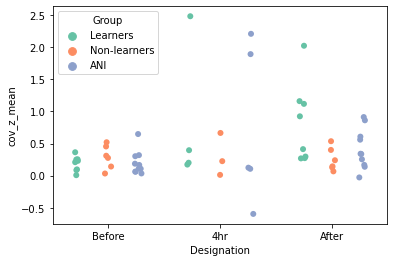

In [38]:
df_use = sigz_freeze_df4_frz_only_sep
sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True)
stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
print(stats_sig)
print(pw_sig)

In [40]:
freeze_silent_cov2_frz_only = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                                         neurons='freeze_onset', keep_silent=True, buffer_sec=(2, 2),
                                                         keep_events='freeze_onset', keep_buffer=(2, 2))
sigz_freeze_df2_frz_only_sep = cova.cov_dict_to_df(freeze_silent_cov2_frz_only, baseline_dict_use=all_cov, 
                                                   include_silent=True, group_ctrls=False)
sigz_freeze_df2_frz_only_sep  = add_memory_designations(sigz_freeze_df2_frz_only_sep)

Marble07: 4it [00:04,  1.01it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:05,  1.01it/s]
Marble12: 4it [00:03,  1.20it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:05,  1.20it/s]
Marble24: 4it [00:03,  1.20it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:05,  1.19it/s]
Marble27: 4it [00:03,  1.16it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:05,  1.16it/s]
Marble06: 4it [00:03,  1.15it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:07,  1.17s/it]
Marble11: 4it [00:04,  1.04s/it]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:06,  1.04s/it]
Marble29: 4it [00:03,  1.12it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:05,  1.12it/s]
Marble17: 4it [00:04,  1.01s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:05,  1.00it/s]
Marble18: 4it [00:03,  1.21it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:04,  1.21it/s]
Marble19: 4it [00:03,  1.11it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:05,  1.11it/s]
Marble20: 4it [00:03,  1.23it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:04,  1.22it/s]
Marble25: 4it [00:03,  1.11it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:05,  1.11it/s]
/Users/nkinsky/Documents/BU/GitHub/Eraser/covariance_analysis.py:406: RuntimeWarning: Mean of empty slice
  nactive = active_bool.sum()


                Source          SS    DF        MS         F     p-unc  \
0          Designation   12.536134   2.0  6.268067  1.689402  0.194998   
1                Group    0.282027   2.0  0.141013  0.038007  0.962734   
2  Designation * Group   29.153152   4.0  7.288288  1.964377  0.114350   
3             Residual  185.511422  50.0  3.710228       NaN       NaN   

        np2  
0  0.063299  
1  0.001518  
2  0.135808  
3       NaN  
               Contrast         Group         A             B Paired  \
0                 Group             -       ANI      Learners  False   
1                 Group             -       ANI  Non-learners  False   
2                 Group             -  Learners  Non-learners  False   
3           Designation             -       4hr         After  False   
4           Designation             -       4hr        Before  False   
5           Designation             -     After        Before  False   
6   Group * Designation           ANI       4hr        

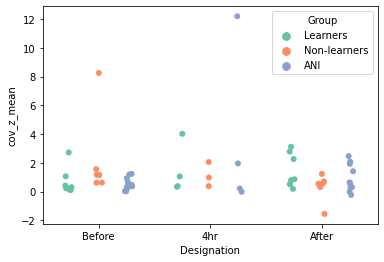

In [41]:
df_use = sigz_freeze_df2_frz_only_sep
sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True)
stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
print(stats_sig)
print(pw_sig)

In [42]:
freeze_silent_cov6_frz_only = cova.group_cov_across_days(bin_size=bin_size, arena1='Shock', arena2='Shock',
                                                         neurons='freeze_onset', keep_silent=True, buffer_sec=(6, 6),
                                                         keep_events='freeze_onset', keep_buffer=(6, 6))
sigz_freeze_df6_frz_only_sep = cova.cov_dict_to_df(freeze_silent_cov6_frz_only, baseline_dict_use=all_cov, 
                                                   include_silent=True, group_ctrls=False)
sigz_freeze_df6_frz_only_sep  = add_memory_designations(sigz_freeze_df6_frz_only_sep)

Marble07: 4it [00:03,  1.02it/s]

No tunings found for Marble07 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble07: 6it [00:05,  1.02it/s]
Marble12: 4it [00:03,  1.14it/s]

No tunings found for Marble12 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble12: 6it [00:05,  1.17it/s]
Marble24: 4it [00:03,  1.18it/s]

No tunings found for Marble24 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble24: 6it [00:05,  1.17it/s]
Marble27: 4it [00:03,  1.14it/s]

No tunings found for Marble27 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble27: 6it [00:05,  1.14it/s]
Marble06: 4it [00:03,  1.13it/s]

No position data found for Marble06 Shock day 7, loading neural data only


Marble06: 6it [00:07,  1.18s/it]
Marble11: 4it [00:04,  1.08s/it]

No tunings found for Marble11 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble11: 6it [00:06,  1.08s/it]
Marble29: 4it [00:03,  1.10it/s]

No tunings found for Marble29 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble29: 6it [00:05,  1.09it/s]
Marble17: 4it [00:04,  1.00s/it]

No tunings found for Marble17 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble17: 6it [00:05,  1.00it/s]
Marble18: 4it [00:03,  1.22it/s]

No tunings found for Marble18 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble18: 6it [00:04,  1.22it/s]
Marble19: 4it [00:03,  1.11it/s]

No tunings found for Marble19 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble19: 6it [00:05,  1.11it/s]
Marble20: 4it [00:03,  1.21it/s]

No tunings found for Marble20 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble20: 6it [00:04,  1.21it/s]
Marble25: 4it [00:03,  1.07it/s]

No tunings found for Marble25 Shock day 7: run .get_tuning_sig() and .save_sig_tuning()


Marble25: 6it [00:05,  1.08it/s]


                Source        SS    DF        MS         F     p-unc       np2
0          Designation  0.678108   2.0  0.339054  3.565064  0.035547  0.122658
1                Group  0.187423   2.0  0.093711  0.985349  0.380302  0.037204
2  Designation * Group  0.304612   4.0  0.076153  0.800728  0.530379  0.059091
3             Residual  4.850336  51.0  0.095105       NaN       NaN       NaN
               Contrast         Group         A             B Paired  \
0                 Group             -       ANI      Learners  False   
1                 Group             -       ANI  Non-learners  False   
2                 Group             -  Learners  Non-learners  False   
3           Designation             -       4hr         After  False   
4           Designation             -       4hr        Before  False   
5           Designation             -     After        Before  False   
6   Group * Designation           ANI       4hr         After  False   
7   Group * Designation      

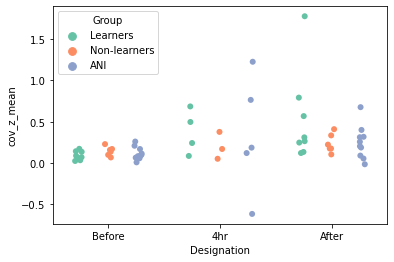

In [43]:
df_use = sigz_freeze_df6_frz_only_sep
sns.stripplot(x="Designation", y="cov_z_mean", hue="Group", size=6, palette=cmap_use,
                  data=df_use[~(df_use['Designation'] == '')], dodge=True)
stats_sig = pg.anova(data=df_use[~(df_use['Designation'] == '')], dv='cov_z_mean', 
                         between=['Designation', 'Group'])
pw_sig = pg.pairwise_tests(data=df_use[~(df_use['Designation'] == '')], padjust='bonf', dv='cov_z_mean', 
                               between=['Group', 'Designation'], parametric=False)
print(stats_sig)
print(pw_sig)